In [1]:
from __future__ import division
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

### Notes on 1A

In original submittal there was an error in how I calculated the average error for A2. This created an error in the slope submitted for A3. I believe I have corrected the error. But the slope of the line A3, is about 1. I would expect it to be 2, which is the order of the Heun's method. 

In [19]:
#define error list
E = []
#set initial power to 2
p=2
#y_0 initial condition
y_0 = (np.pi / np.sqrt(2))
#norm list var
E_list = []
norm_list = []
#delta_t list
delta_t_list = []

for p in range(2,9):
    #define delta_T
    delta_t = 2**-p
    delta_t_list.append(delta_t)
    
    #define time interval
    start = 0 
    stop = 5

    #determine number of points in time array
    t_pts = int(1 + ((stop - start) / delta_t))
    #create numpy array for time interval
    t = np.linspace(start,stop,t_pts)

    #initiate y array
    y = []

    #Euler Method Calculation
    y.append(y_0)

    #loop through and calculate y values with heun's
    for i in range(0,len(t)-1):
        #calculate dy/dt
        dydt = -3*y[i]*np.sin(t[i])
        #calc dydt plus delta_t
        dydt_dt = -3*(y[i]+delta_t*dydt)*np.sin(t[i+1])
        y.append(y[i]+(delta_t/2)*(dydt+dydt_dt))
        
    #Real function calculation
    real = []
    for i in range(0,len(t)):
        real.append((np.pi*np.e**(3*(np.cos(t[i])-1))/ np.sqrt(2)))
        
        
    #reset norm variable
    norm = 0
    #loop through and calculate error
    for i in range(0,len(t)-1):
        norm = norm + ((real[i] - y[i])**2)
    
    #reset norm variable
    E = 0
    for i in range(0,len(t)):
        #loop through and calculate error
        E = abs(real[i] - y[i])
        E_list.append(E)

    norm_list.append(np.average(E_list))

#solutions
A4 = y
np.savetxt('A4.dat', A4)
A5 = norm_list
np.savetxt('A5.dat', A5)

#calculate polyfit line
slope, intercept = np.polyfit(np.log(delta_t_list),np.log(norm_list),1)
A6=[]
A6.append(slope)
np.savetxt('A6.dat', A6)

In [20]:
A5

[0.023454070405976073,
 0.01058074469855951,
 0.005072239719296093,
 0.0024921817254669964,
 0.0012372092305673419,
 0.0006168663301497783,
 0.00030811640534902175]

In [21]:
A6

[1.0352453349821031]

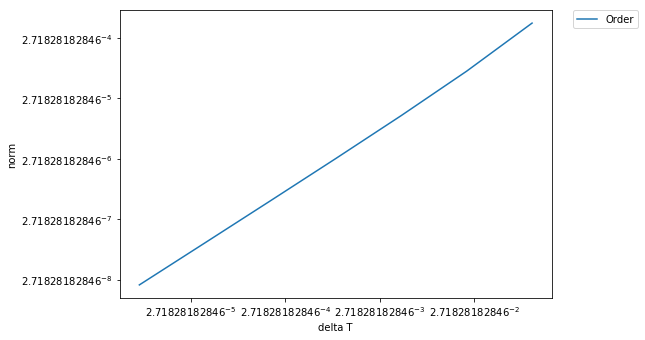

In [22]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

#ax.plot(norm_list, delta_t_list, label = 'Order')
ax.plot(delta_t_list, norm_list, label = 'Order')

#title axis
ax.set_xlabel('delta T')
ax.set_ylabel('norm')
ax.set_title('')
ax.set_yscale('log', basey = np.e)
ax.set_xscale('log', basex = np.e)

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

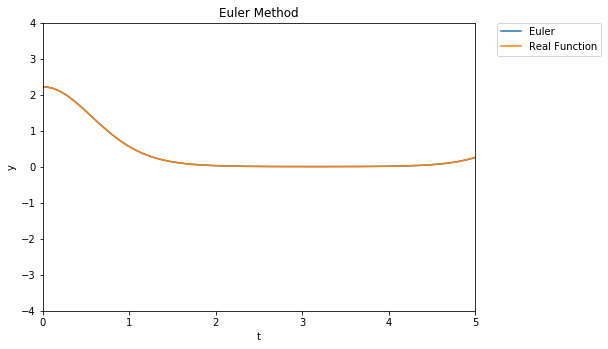

In [23]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(t,y, label = 'Euler')
ax.plot(t,real, label = 'Real Function')


#set limits on x axis
ax.set_xlim(0,5)
ax.set_ylim(-4,4)

#title axis
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Euler Method')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()